# Topics in numerical programming Problem set 1 
B00751897 <br>
Yi Ming Chang<br>
Jan 25th, 2021

# Problem 1: 2d Ising model

# Part 1 a)

In [3]:
"""
Monte Carlo simulation of the 2D Ising model
"""
from scipy import *
from pylab import *

# e.g. N=10, Nsweep=1000
# N=100 is too much
N = 20        # linear dimension of the lattice, lattice-size= N x N
Nsweep=1000
Nitt=N*N*Nsweep # measure in MCS monte carlo sweeps of lattice

warm = 10000     # Number of warmup steps
measure=100     # How often to take a measurement

def RandomL(N):
    "Radom lattice, corresponding to infinite temperature"
    latt = zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            latt[i,j] = sign(2*rand()-1)
    return latt

def SamplePython(Nitt, latt, PW):
    "Monte Carlo sampling for the Ising model in Python"
    Mn=sum(latt)         # Starting magnetization (total Magnetization of a N*N Lattice matrix)
    
    Naver=0       # Measurements
    Eaver=0.0
    Maver=0.0
    
    N2 = N*N
    for itt in range(Nitt):
        t = int(rand()*N2) # random number from 0 to 400
        (i,j) = (t % N, int(t/N))  # pick a random spin every time to flip
        S = latt[i,j]
        WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]   # PBC periodic boundary
        P = PW[4+S*WF]
        if P>rand(): # flip the spin
            latt[i,j] = -S
            Mn -= 2*S
            
        if itt>warm and itt%measure==0:
            Naver += 1
            Maver += abs(Mn)

    if Naver>0:
        Naver *= N*N    # per spin
        return Maver/Naver
    else:
        return 0.0

4.0 0.0874852526288792
3.794736842105263 0.08542190305206464
3.5894736842105264 0.09310977173634265
3.3842105263157896 0.10229930751474738
3.1789473684210527 0.11991921005385997
2.973684210526316 0.14326365734803795
2.768421052631579 0.19211977430110286
2.5631578947368423 0.2776942805847653
2.3578947368421055 0.5958258527827648
2.1526315789473687 0.8288368812516029
1.9473684210526314 0.9326147730187228
1.7421052631578946 0.9631674788407284
1.5368421052631578 0.9839766606822262
1.331578947368421 0.9931097717363426
1.1263157894736842 0.9981905616824827
0.9210526315789473 0.9996742754552449
0.7157894736842105 0.9999769171582457
0.5105263157894737 1.0
0.3052631578947369 1.0
0.1 1.0


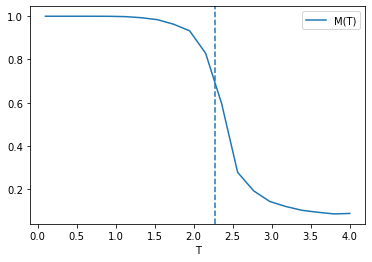

In [78]:
    latt = RandomL(N)
    PW = zeros(9, dtype=float)

    wT = linspace(4,0.1,20)  # at least 10 temperatures (avoid 0.0, or recode PW to be 0 or 1 for T=0)
    wMag=[]
    
    for T in wT:       
        # Precomputed exponents for every T
        PW[4+4] = exp(-4.*2/T)
        PW[4+2] = exp(-2.*2/T)
        PW[4+0] = 1.0        # exp(0.*2/T)
        PW[4-2] = exp( 2.*2/T)
        PW[4-4] = exp( 4.*2/T)
    
        maver = SamplePython(Nitt, latt, PW)
        wMag.append(maver)
        print(T, maver)
        
    plot(wT, wMag, label='M(T)')
    axvline(x=2.27,linestyle = '--')
    xlabel('T')
    legend(loc='best')
    show()


Where the dash line is critical temperature: $T_c$. I think the x-axis should be labeled as $k_BT$ with unit J, which is an energy unit. I thought in the assignment J is interaction strength.<br>
When $T$ > $T_c$, it is looks like an ordered phase. Spins desire to be aligned, so the configurations in which adjacent spins are of the same sign have higher probability. From the plot, we have spins align up (spin up), so that the average absolute magnetization near or equal to 1. 

When $T$< $T_c$, it is looks like a disordered phase. The adjacent spins tend to have opposite signs, so the average absolute magnetization near to zero. 

# Part 1 b)

In [10]:
"""
Monte Carlo simulation of the 2D Ising model
"""
from scipy import *
from pylab import *

# e.g. N=10, Nsweep=1000
# N=100 is too much
N = 4        # linear dimension of the lattice, lattice-size= N x N
Nsweep=100000 # increaed the number of Nsweep to make data look more smooth
Nitt=N*N*Nsweep # measure in MCS monte carlo sweeps of lattice

def RandomL(N):
    "Radom lattice, corresponding to infinite temperature"
    latt = zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            latt[i,j] = sign(2*rand()-1)
    return latt

def SamplePython(Nitt, latt, PW):
    "Monte Carlo sampling for the Ising model in Python"
    Mn=sum(latt)         # Starting magnetization (total Magnetization of a N*N Lattice matrix)

    mag = []
    
    N2 = N*N
    for itt in range(Nitt):
        t = int(rand()*N2) # random number from 0 to 400
        (i,j) = (t % N, int(t/N))  # pick a random spin every time to flip
        S = latt[i,j]
        WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]   # PBC periodic boundary
        P = PW[4+S*WF]
        if P>rand(): # flip the spin
            latt[i,j] = -S
            Mn -= 2*S
        mag.append(Mn)
    return mag

Text(0, 0.5, 'P(M)')

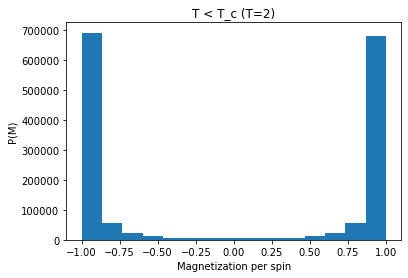

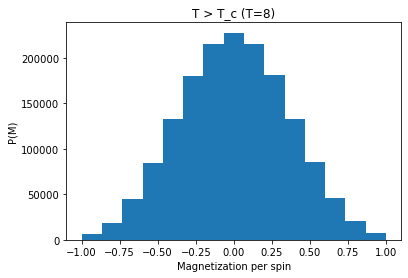

In [11]:
latt = RandomL(N)
PW = zeros(9, dtype=float)


T = 2 # T < T_c
      
# Precomputed exponents for every T
PW[4+4] = exp(-4.*2/T)
PW[4+2] = exp(-2.*2/T)
PW[4+0] = 1.0        # exp(0.*2/T)
PW[4-2] = exp( 2.*2/T)
PW[4-4] = exp( 4.*2/T)
    
M1 = SamplePython(Nitt, latt, PW)
Mave1 = [x / int(N*N) for x in M1] # divide N*N through the entire list to obtain Magnetization per spin
figure(1)
hist(Mave1,bins=15)
title('T < T_c (T=2)')
xlabel('Magnetization per spin')
ylabel('P(M)')


PW = zeros(9, dtype=float)
T = 8 # T > T_c      
# Precomputed exponents for every T
PW[4+4] = exp(-4.*2/T)
PW[4+2] = exp(-2.*2/T)
PW[4+0] = 1.0        # exp(0.*2/T)
PW[4-2] = exp( 2.*2/T)
PW[4-4] = exp( 4.*2/T)
    
M2 = SamplePython(Nitt, latt, PW)
Mave2 = [x / int(N*N) for x in M2] # divide N*N through the entire list to obtain Magnetization per spin
figure(2)
hist(Mave2, bins=15)
title('T > T_c (T=8)')
xlabel('Magnetization per spin')
ylabel('P(M)')

Yes, $T$ < $T_c$ is bimodal and $T$ > $T_c$ is unimodal. I pick T = 2 and T = 8. I am not sure should I keep the warm up if statement in order to eliminate the noise data, but I think both plots look exactly what the question wants.

# Part 1 c)

The average first passage time: 6315.201581027668


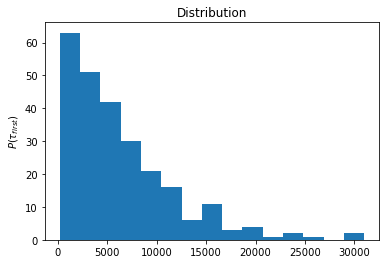

In [12]:
Count1 = 0 # A counter uses to measure the times from 1 to -1
Count2 = 0 # A counter uses to measure the times from -1 to 1
A = 0 # A Counter uses to measure how many times that 1 has appear, it will reset when passes -1
B = 0 # A Counter uses to measure how many times that -1 has appear, it will reset when passes 1
P = [] # Probability P(M)

for i in range (len(Mave1)):
    
    # the counter start from the first 1 to the first -1
    if Mave1[i] == 1:
        Count1 += 1
        A += 1
    elif Mave1[i] < 1 and Mave1[i] > -1: # since this section will repeat so I create A and B to see when is first 1 and -1
        Count1 += 1
    elif Mave1[i] == -1 and B == 0:
        P.append(Count1)
        Count1 = 0
        A = 0
    
    # the counter start from the first -1 to the first 1
    if Mave1[i] == -1:
        Count2 += 1
        B += 1
    elif Mave1[i] > -1 and Mave1[i] < 1:
        Count2 += 1
    elif Mave1[i] == 1 and A == 1:
        P.append(Count2)
        Count2 = 0
        B = 0
    
    # if it is not from 1 to -1 reset the clock
    if A == 0:
        Count1 = 0
    
    # if it is not from -1 to 1 reset the clock
    if B == 0:
        Count2 = 0

P.pop(0)      
hist(P,bins = 15)
xlabel
ylabel(r'$P(\tau_{first})$')
title('Distribution')
print('The average first passage time:',sum(P)/len(P))


The distribution is in exponential decay, I take out the code of warm up and measure number for every 100 values. So the data may have more noise or repeated number than it originally would have. When I keep the warm up step, the average first passage time that I obtain is around 60s. Without that if statement I obtain 6315.20158s as my average first passage time.

ADR: good to show exponential directly (add curve or log-linear scale). Yes, if too fast you need to not only measure every 100.

# Problem 2: SSA

# Part 2 a)

# Theoretical method/ideal of the function

Assume there is one particle exist in a system. The system is consists of state 1 $s_+$, state 2 $s_0$, and state 3 $s_-$. A transition towards state 1 and state 3 is $\Gamma_1$. A transition towards state 2 is $\Gamma_0$. And state 1 and state 3 can only transfer to state 2. The total transition rate at middle region, state 2, is $\Gamma_{tot1}$ = 2$\Gamma_1$. The total transition rate at state 1 and state 2 is $\Gamma_{tot2}$ = $\Gamma_1$.

dt1 = -$\frac{1}{\Gamma_{tot1}}ln(1-random)$
dt2 = -$\frac{1}{\Gamma_{tot2}}ln(1-random)$

Probability going towards state 2 from state 1 and 3 is $\frac{\Gamma_1}{\Gamma_{tot2}}$ = 1, so the transition rate is 100% <br>
Probability going towards state 1 and state 3 from state 2 is $\frac{1}{2}$

In [18]:
# A function that takes Gamma_1 as input
def P(gamma_1):
    T = 0 # used to record the cummulative time
    t = 0 # used to update the transition period and will be reset for every transition from state 1 to state 3, vice versa
    tlist = [] # retore the time from state 1 to state 3
    A = 0 # used to see if it is the first time been state 1
    B = 0 # used to see if it is the first time been state 2
    s1 = 1 # state 1, s_+
    s2 = 0 # state 2, s_0
    s3 = 0 # state 3, s_-
    gamma_0 = 1 # I set gamma_0 = 1 so y = gamma_1
    gamma_total1 = (gamma_1*2) # total transition rate at middle region (state 2)
    gamma_total2 = (gamma_0) # total transition rate at state 1 and state 3
    
    # True if the cumulative not over 10000s
    while T < 10000:
        
        # SSA (Gillespie algorithm)
        dt1 = -1/gamma_total1*log(1-random()) 
        dt2 = -1/gamma_total2*log(1-random())
        
        # pick a random number
        x = random()
        
        if s1 != 0: # if particle at state 1
            s1 -= 1
            s2 += 1
            A += 0 # update if it is not the frist time being in state 1 
            t += dt2

        elif s2 != 0: # if particle at state 2
            if x > gamma_1/gamma_total1: # go to state 3
                s2 -= 1
                s3 += 1
                t += dt1
                if B == 0: # check if it is first time in state 3
                    tlist.append(t)
                    T += t
                    t = 0
                    A = 0
                    
            else: # go to state 1
                s2 -= 1
                s1 += 1
                t += dt1
                if A == 0: # check if it is first time in state 1
                    tlist.append(t)
                    T += t
                    t = 0
                    B = 0

        elif s3 != 0: # if particle at state 3
            s3 -= 1
            s2 += 1
            B += 1 # update if it is not the frist time being in state 2
            t += dt2

    return tlist


Text(0.5, 1.0, 'y = 0.5')

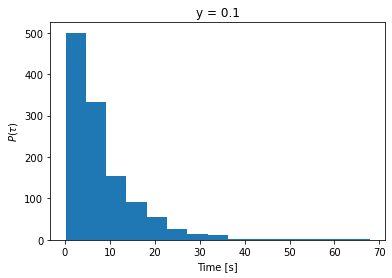

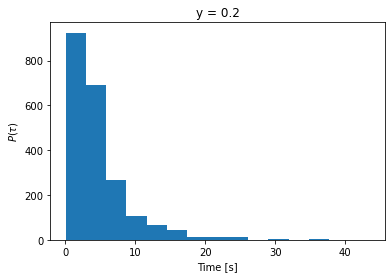

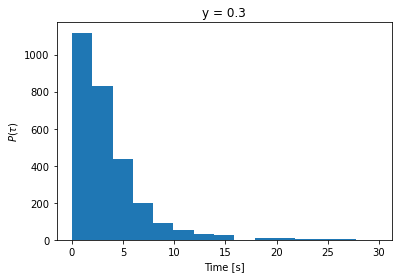

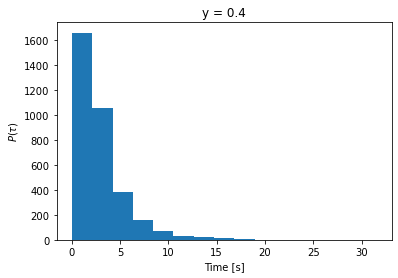

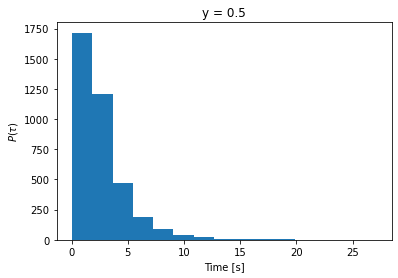

In [24]:
# plot the distribution with various value of y

tlist1 = P(0.5)
tlist2 = P(0.1)
tlist3 = P(0.2)
tlist4 = P(0.3)
tlist5 = P(0.4)


figure(1)
hist(tlist2,bins=15)
xlabel('Time [s]')
ylabel(r'$P(\tau)$')
title('y = 0.1')

figure(2)
hist(tlist3,bins=15)
xlabel('Time [s]')
ylabel(r'$P(\tau)$')
title('y = 0.2')

figure(3)
hist(tlist4,bins=15)
xlabel('Time [s]')
ylabel(r'$P(\tau)$')
title('y = 0.3')

figure(4)
hist(tlist5,bins=15)
xlabel('Time [s]')
ylabel(r'$P(\tau)$')
title('y = 0.4')  

figure(5)
hist(tlist1,bins=15)
xlabel('Time [s]')
ylabel(r'$P(\tau)$')
title('y = 0.5')

I find the first few columns (0 to 5) are getting higher at y increases, the cases start concentrated to the first few columns. Since, y increased will make the transition time between middel region to state1 or state3 smaller. Overall, the total and average $\tau$ from $s_+$ to $s_-$ or $s_-$ to $s_+$ will become shorter as y increases. This is also why our x-axis gets shorter, and y-axis gets higher.

# Part 2 b)

Text(0.5, 1.0, '$\\langle\\tau\\rangle$ vs. y')

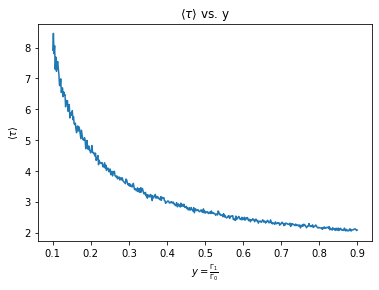

In [20]:
average_tau = [] # use to store average <tau>
for i in linspace(0.1,0.9,500): # 500 different values of y as input
    tlist = P(i)
    average_tau.append(sum(tlist)/len(tlist)) # store average tlist

# plot <tau> vs. y
y = linspace(0.1,0.9,500)
plot(y,average_tau)
xlabel(r'$y = \frac{\Gamma_1}{\Gamma_0}$')
ylabel(r'$\langle\tau\rangle$')
title(r'$\langle\tau\rangle$ vs. y')

It seems like the average time $\tau$ decreases as y increases. It makes sense because the large $\Gamma_1$ we have, it would be easier to tranfer from state 1 to state 3 directly, vice verse. And this will take less time.


ADR: a theory curve would be helpful. 9.5/10